# Fun with Functions and Pandas!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1L3iQxax1kApSJ0X02-YdO0B_vlbFh0Wl?usp=sharing)

# Overview of Functions

Python is an object-oriented language. Thus, functions are used to create objects or modify an existing object.

In general, data science and R practices easily complement Python; in other words, function-oriented programming implements functions *onto* objects in Python, thus making it complementary.

So, we assign them to variables, store to lists, pass them as aurguments to other functions, create them inside functions and even produce a function as a result of a funcion

Make sure to keep in mind that:

- Functions need to be "pure" meaning that if you call it again with the same inputs you get the same results. sys.time() not a "pure" function

- The execution of the function shouldn't change global variables, have no side effects.

For reference, these are the types of functions you'll see:

![Function Types](https://github.com/UVADS/DS-3001/blob/main/02_function_basics/fp.png?raw=1)

## Let's build a function!
Below, we construct a simple function.

In [1]:
def my_mean(x):
    Sum_val = sum(x)
    N = len(x)
    return(Sum_val/N)  # Return is optional but helps with clarity!

In [2]:
my_mean([1, 2])

1.5

Now, let's construct a "function factory" or "nested function"

In [3]:
def power1(exp):
    def action(x):
        return x**exp
    return action

In [4]:
power1(2)

<function __main__.power1.<locals>.action(x)>

In [5]:
cube = power1(2)
cube(3)

9

# Meet Pandas :)

In [6]:
#!pip install pandas
import pandas as pd
import numpy as np

![A Panda in a forest](https://upload.wikimedia.org/wikipedia/commons/c/cd/Panda_Cub_from_Wolong%2C_Sichuan%2C_China.JPG)




Pandas is **the** industry standard tool for small-to-medium datasets, and provides an enormous amount of extremely helpful functionality for manipulating, filtering, and augmenting datasets.

If you're familiar with working with data in a spreadsheet format (via Excel, Google Sheets, Tableau, Stata, etc.) then Pandas's ``` DataFrame ``` object will feel pretty familiar to you.

## Creating a `DataFrame` Object

One common way to populate a DataFrame is to create an empty DataFrame, then add columns usings lists.

In [7]:
data = pd.DataFrame()

In [8]:
# Empty!
data

""


In [9]:
# Empty, but has column name!
data['column1'] = []
data

,column1


In [10]:
data['column1'] = [1, 1, 2, 3, 5, 8]
data

,column1
0,1
1,1
2,2
3,3
4,5
5,8


In [11]:
data['column1'] = [":)"]*6
data['column2'] = [":o"]*6
data['column3'] = ["!!!!"]*6
data

,column1,column2,column3
0,:),:o,!!!!
1,:),:o,!!!!
2,:),:o,!!!!
3,:),:o,!!!!
4,:),:o,!!!!
5,:),:o,!!!!


It is also easy to go from a dictionary form:

In [12]:
data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    ])
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115


Finally, you can directly read in data by external links (mind the file extension)

In [13]:
cars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")
cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Pandas data comes in tables. Think of it like Excel in Python!

We read in the cars dataset from a GitHub csv link using pd.read_csv() and stored it in the cars variable.

In [14]:
# First 5 rows of DataFrame
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
# Last 5 rows of DataFrame
cars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [16]:
cars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [17]:
# (rows, columns)
cars.shape

(32, 12)

### Series objects

In [18]:
type(cars)

pandas.core.frame.DataFrame

In [19]:
type(cars['model'])

pandas.core.series.Series

In [20]:
cars['model'] # This is a series

0               Mazda RX4
1           Mazda RX4 Wag
2              Datsun 710
3          Hornet 4 Drive
4       Hornet Sportabout
5                 Valiant
6              Duster 360
7               Merc 240D
8                Merc 230
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
17               Fiat 128
18            Honda Civic
19         Toyota Corolla
20          Toyota Corona
21       Dodge Challenger
22            AMC Javelin
23             Camaro Z28
24       Pontiac Firebird
25              Fiat X1-9
26          Porsche 914-2
27           Lotus Europa
28         Ford Pantera L
29           Ferrari Dino
30          Maserati Bora
31             Volvo 142E
Name: model, dtype: object

In [21]:
type(cars[['model']])

pandas.core.frame.DataFrame

In [22]:
cars[['model']].head() # This is a Pandas DataFrame

,model
0,Mazda RX4
1,Mazda RX4 Wag
2,Datsun 710
3,Hornet 4 Drive
4,Hornet Sportabout


### Changing column names

We will change all the column names to be more understandable. The `inplace=False` is the default argument for a lot of pandas functions, and it means that the function returns a modified data frame which you have to reassign to cars again. If you don't want to reassign it, you use `inplace=True`

In [23]:
cars = cars.rename(columns={'disp':'displacement', 'drat': 'rear_axle_ratio', 'qsec': '1/4_mile_time',
                            'vs': 'engine_type', 'am': 'transmission_type', 'carb': 'carburetors'})

There are two ways to get a column of a DataFrame. One way is `cars['COLUMN_NAME']` and the other way is `cars.COLUMN_NAME`. You can also get multiple columns using `cars[['column1', 'column2']]`

In [24]:
cars.model.head(5)

0            Mazda RX4
1        Mazda RX4 Wag
2           Datsun 710
3       Hornet 4 Drive
4    Hornet Sportabout
Name: model, dtype: object

In [25]:
cars[['model']].head(5)

,model
0,Mazda RX4
1,Mazda RX4 Wag
2,Datsun 710
3,Hornet 4 Drive
4,Hornet Sportabout


In [26]:
# Creates a DataFrame of only the columns listed
cars[['model', 'displacement']].head(5)

,model,displacement
0,Mazda RX4,160.0
1,Mazda RX4 Wag,160.0
2,Datsun 710,108.0
3,Hornet 4 Drive,258.0
4,Hornet Sportabout,360.0


## Advanced `Pandas` functions

## `Pandas` functions

1. df.query() -- Pick observations by their values
2. df.sort_values() -- Reorder the rows
3. df.loc[] -- Pick variables by their row or column names and/or conditions --  *note: There are several other ways to select or exclude data, so we will go over these at greater length in this document*
4. df.assign() -- Create new variables with functions of existing variables
5. df.describe() -- Collapse many values down to a single summary

### `.query()`

Using .query(), we retrieve all variables that fulfill some Boolean (True/False) expression.

For more, check out the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

We will use the builtin `mpg` dataset built in to the R library and copied into Python.

In [27]:
# Might need to pip install this package, not part of the conda distubution
!pip install pydataset
from pydataset import data

In [28]:
mpg_data = data('mpg')
mpg_data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Now, we set a criteria for the data. Maybe we only want 4-cylinder vehicles:

In [29]:
filtered_mpg = mpg_data.query('cyl == 4')
filtered_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


In [30]:
filtered_mpg.query('cyl == 4 and year > 2007').head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
34,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize


In [31]:
filtered_mpg.query('manufacturer == "audi" or manufacturer == "chevrolet"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact
33,chevrolet,malibu,2.4,1999,4,auto(l4),f,19,27,r,midsize
34,chevrolet,malibu,2.4,2008,4,auto(l4),f,22,30,r,midsize


### Filtering Columns Directly

In [32]:
filtered_mpg[filtered_mpg.manufacturer == "audi"]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact


In [33]:
# And condition
filtered_mpg[(filtered_mpg.manufacturer == "audi") & (filtered_mpg.model == "a4")]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [34]:
# Or condition
filtered_mpg[(filtered_mpg.manufacturer == "audi") | (filtered_mpg.model == "a4")]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact


### `.sort_values()`

You use this to sort rows or columns in a DataFrame based on the values in specific columns. Consider the following function call:

df.sort_values(by, axis=0, ascending=True, inplace=False)

The most important parameters for this course are *by*, *ascending*, and, possibly, *ignore_index* and *na_position*.

* *by* refers to the name or list of names you're sorting values by. Typically,
you might be sorting rows based on alphabetical names. For this, you'd enter `df.sort_values(by='names')`.

* *ascending* refers to whether you want to sort in ascending or descending order. If you want to sort in reverse alphabetical order, just enter `ascending=False`.

* *inplace* refers to whether you want to automatically apply the sort to the DataFrame or store it in a temporary copy. If True, you will not even need to store the function call in a variable, as it will immediately change the original variable when called.

For more information, check out the documentation! https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

Now, let's consider an example! We'll continue using the same `mpg` dataset we used in the previous example. Let's say we want to sort by year.

In [35]:
sorted_mpg = mpg_data.sort_values(by='year')
sorted_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
126,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv
131,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
134,land rover,range rover,4.6,1999,8,auto(l4),4,11,15,p,suv
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


Now, I also want to find the highest cty mileage in the most recent years. Let's re-sort it:

In [36]:
sorted_mpg2 = mpg_data.sort_values(by=['year', 'hwy'], ascending=False)
sorted_mpg2.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact
105,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


Now, maybe I'm trying to get a list of the top 5 cars based on those criteria, and I don't care about the initial indices. To fix that, I could just ignore the indices:

In [37]:
sorted_mpg3 = mpg_data.sort_values(by=['year', 'hwy'], ascending=True, ignore_index=True)
sorted_mpg3.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,k1500 tahoe 4wd,5.7,1999,8,auto(l4),4,11,15,r,suv
1,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
2,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv
3,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
4,dodge,ram 1500 pickup 4wd,5.9,1999,8,auto(l4),4,11,15,r,pickup


### `.loc[]` (and slicing)

There are many ways to select or exclude columns in Python. The first option, if presented two columns you'd like you keep is through slicing. You'd do so like this:

`df = df[['col1', 'col2']]`

Alternatively, you could get the same result from:

`df = df.loc[:, 'col1':'col3']`

#### Common questions about this method:
- *What's up with the colon?*

.loc[] has two positions: the rows and columns. `:` means that we want to keep all rows associated with these columns.
- *We only want col1 and col2; why does it go to col3?*

Slicing in Python is upper-bound exclusive. This means that the upper bound is not actually included in the final product, so you go one above the desired value.

In other scenarios, you might have many columns you want to *keep* and a few you want to remove. For this, the easiest method is .drop(). Consider:

`df = df.drop([cols to drop as list], axis=1)`

*Why am I using axis=1?* Because this drops the columns instead of the rows. Consider -- how else could you use .drop()?

Let's select only columns referring to daily data.

One thing you'll notice is that R uses the startswith() function *in* their select method. We can do something similar, but I'll show you the long way first.

In [38]:
sorted_mpg3.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,k1500 tahoe 4wd,5.7,1999,8,auto(l4),4,11,15,r,suv
1,dodge,dakota pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
2,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv
3,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
4,dodge,ram 1500 pickup 4wd,5.9,1999,8,auto(l4),4,11,15,r,pickup


In [39]:
sorted_mpg3[['manufacturer', 'trans']].head(5)

,manufacturer,trans
0,chevrolet,auto(l4)
1,dodge,auto(l4)
2,dodge,auto(l4)
3,dodge,auto(l4)
4,dodge,auto(l4)


In [40]:
sorted_mpg3[['manufacturer', 'trans']].iloc[0:5]

,manufacturer,trans
0,chevrolet,auto(l4)
1,dodge,auto(l4)
2,dodge,auto(l4)
3,dodge,auto(l4)
4,dodge,auto(l4)


In [41]:
sorted_mpg3.loc[:, 'manufacturer':'cyl']

,manufacturer,model,displ,year,cyl
0,chevrolet,k1500 tahoe 4wd,5.7,1999,8
1,dodge,dakota pickup 4wd,5.2,1999,8
2,dodge,durango 4wd,5.9,1999,8
3,dodge,ram 1500 pickup 4wd,5.2,1999,8
4,dodge,ram 1500 pickup 4wd,5.9,1999,8
...,...,...,...,...,...
229,honda,civic,1.8,2008,4
230,toyota,corolla,1.8,2008,4
231,honda,civic,1.8,2008,4
232,honda,civic,1.8,2008,4


In [42]:
sorted_mpg3.loc[7:10, 'manufacturer':'cyl']

,manufacturer,model,displ,year,cyl
7,land rover,range rover,4.6,1999,8
8,toyota,land cruiser wagon 4wd,4.7,1999,8
9,dodge,durango 4wd,5.2,1999,8
10,dodge,ram 1500 pickup 4wd,5.2,1999,8


In [43]:
# Assumes 0 (first row) to 5
sorted_mpg3.loc[:5, 'manufacturer':'cyl']

,manufacturer,model,displ,year,cyl
0,chevrolet,k1500 tahoe 4wd,5.7,1999,8
1,dodge,dakota pickup 4wd,5.2,1999,8
2,dodge,durango 4wd,5.9,1999,8
3,dodge,ram 1500 pickup 4wd,5.2,1999,8
4,dodge,ram 1500 pickup 4wd,5.9,1999,8
5,ford,f150 pickup 4wd,5.4,1999,8


In [44]:
# Assumes 230 to last row
sorted_mpg3.loc[230:, 'manufacturer':'cyl']

,manufacturer,model,displ,year,cyl
230,toyota,corolla,1.8,2008,4
231,honda,civic,1.8,2008,4
232,honda,civic,1.8,2008,4
233,toyota,corolla,1.8,2008,4


In [45]:
# Holy negative Batman!
sorted_mpg3.loc[-5:, 'manufacturer':'cyl']

,manufacturer,model,displ,year,cyl
0,chevrolet,k1500 tahoe 4wd,5.7,1999,8
1,dodge,dakota pickup 4wd,5.2,1999,8
2,dodge,durango 4wd,5.9,1999,8
3,dodge,ram 1500 pickup 4wd,5.2,1999,8
4,dodge,ram 1500 pickup 4wd,5.9,1999,8
...,...,...,...,...,...
229,honda,civic,1.8,2008,4
230,toyota,corolla,1.8,2008,4
231,honda,civic,1.8,2008,4
232,honda,civic,1.8,2008,4


### `.assign`
Using .assign(), you can create new independent columns or variables from the pre-existing ones themselves.

We'll return to the mpg dataset. We'll change the city and highway mileage to km/l from mpg. This will involve multiplying all columns using mpg by 1.6 and dividing by 3.8

In [46]:
km_conv = mpg_data.assign(cty=mpg_data.cty * 1.6 / 3.8, hwy = mpg_data.hwy * 1.6/3.8)
km_conv.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,7.578947,12.210526,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,8.842105,12.210526,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,8.421053,13.052632,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,8.842105,12.631579,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,6.736842,10.947368,p,compact


As you'll see, in .assign(), you need to specify where the column data you are using comes from. This can be done using `mpg_data['cty']` or `mpg_data.cty` depending on your preference. In R, you don't need to specify the DataFrame. In Python, however, this is useful if you want to develop the column values based on some prior iteration of the DataFrame as R's mutate() operates on itself by definition.

### `.describe()`

This function creates summary statistics based on your data!

In [47]:
mpg_data.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


We could also compare it to the converted mpg data.

In [48]:
km_conv.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,7.098516,9.869546
std,1.291959,4.509646,1.611534,1.791977,2.507218
min,1.600000,1999.000000,4.000000,3.789474,5.052632
25%,2.400000,1999.000000,4.000000,5.894737,7.578947
50%,3.300000,2003.500000,6.000000,7.157895,10.105263
75%,4.600000,2008.000000,8.000000,8.000000,11.368421
max,7.000000,2008.000000,8.000000,14.736842,18.526316


You've likely noticed that only the numeric data types are displayed here. For more information on your types of variables, you can use `.info()`, which also provides information about other data types (i.e. the DataFrame). `.info()` is equivalent to `str()` in R.

In [49]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### `.value_counts()`

In [50]:
mpg_data['manufacturer'].value_counts().reset_index()

,manufacturer,count
0,dodge,37
1,toyota,34
2,volkswagen,27
3,ford,25
4,chevrolet,19
5,audi,18
6,hyundai,14
7,subaru,14
8,nissan,13
9,honda,9


In [51]:
mpg_data.manufacturer.value_counts().reset_index()

,manufacturer,count
0,dodge,37
1,toyota,34
2,volkswagen,27
3,ford,25
4,chevrolet,19
5,audi,18
6,hyundai,14
7,subaru,14
8,nissan,13
9,honda,9


In [52]:
value_counts = mpg_data.manufacturer.value_counts().rename_axis('Unique Manufacturers').reset_index(name='Counts')
value_counts

,Unique Manufacturers,Counts
0,dodge,37
1,toyota,34
2,volkswagen,27
3,ford,25
4,chevrolet,19
5,audi,18
6,hyundai,14
7,subaru,14
8,nissan,13
9,honda,9


In [53]:
value_counts['Category'] = value_counts['Counts'].apply(lambda x: 'High' if x > 30 else 'Low')
value_counts

,Unique Manufacturers,Counts,Category
0,dodge,37,High
1,toyota,34,High
2,volkswagen,27,Low
3,ford,25,Low
4,chevrolet,19,Low
5,audi,18,Low
6,hyundai,14,Low
7,subaru,14,Low
8,nissan,13,Low
9,honda,9,Low


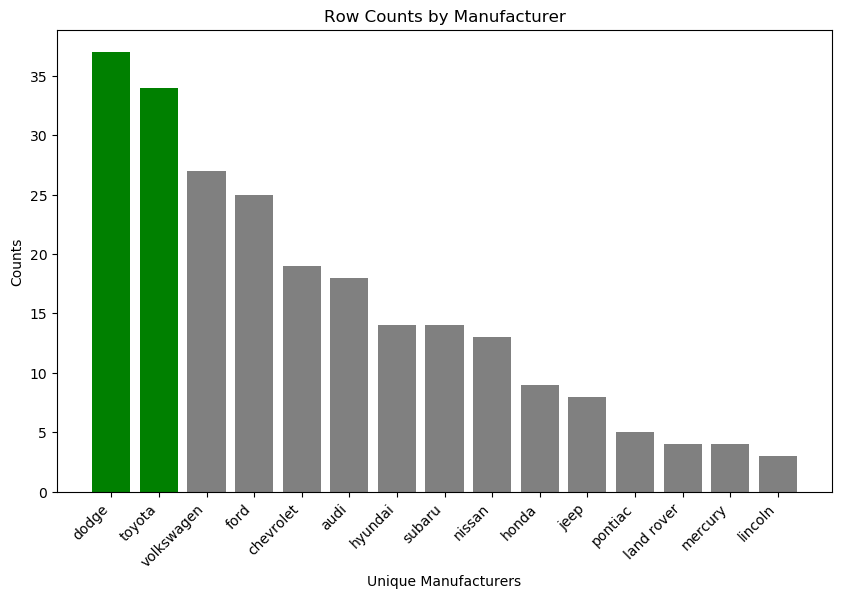

In [54]:
import matplotlib.pyplot as plt

# Set colors based on the 'Category' column
colors = value_counts['Category'].map({'High': 'green', 'Low': 'grey'})

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(value_counts['Unique Manufacturers'], value_counts['Counts'], color=colors)
plt.xlabel('Unique Manufacturers')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Counts')
plt.title('Row Counts by Manufacturer')
plt.show()

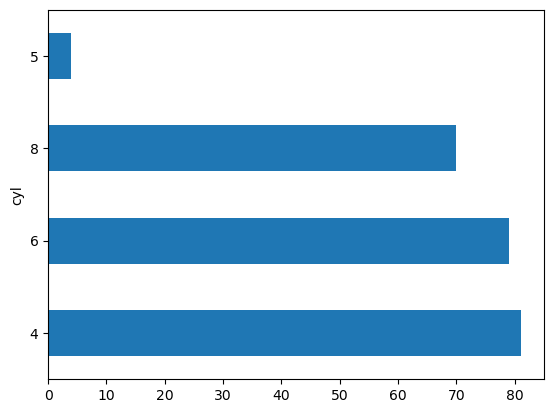

In [55]:
mpg_data.cyl.value_counts().plot(kind='barh')

In [56]:
value_counts_df = mpg_data.cyl.value_counts().reset_index()
value_counts_df['cyl_str'] = value_counts_df['cyl'].astype(str) # Add a column that turns cylinder into a string
value_counts_df

,cyl,count,cyl_str
0,4,81,4
1,6,79,6
2,8,70,8
3,5,4,5


In [57]:
x = value_counts_df["cyl"]
x_str = value_counts_df["cyl_str"]
y = value_counts_df["count"]

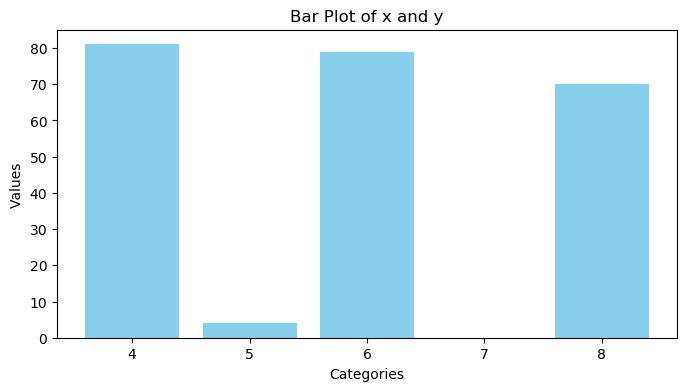

In [58]:
# Plotting a single bar plot
plt.figure(figsize=(8, 4))
plt.bar(x, y, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot of x and y')
plt.show()

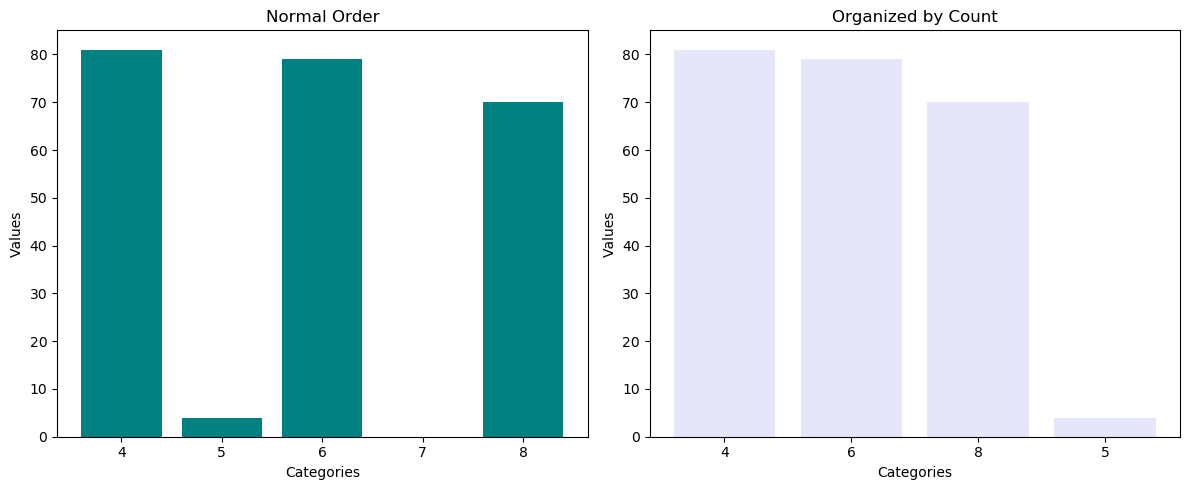

In [59]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot with x and y normally
ax[0].bar(x, y, color='teal')
ax[0].set_title('Normal Order')
ax[0].set_xlabel('Categories')
ax[0].set_ylabel('Values')

# Second subplot with x and y reversed
ax[1].bar(x_str, y, color='lavender')
ax[1].set_title('Organized by Count') # Casting cylinder as a string removed the forced ordering of the x axis
ax[1].set_xlabel('Categories')
ax[1].set_ylabel('Values')

# Adjust layout and show plot
plt.tight_layout()
plt.show()